# Deep Reinforcement Learning using AlphaZero methodology

Please see https://applied-data.science/blog/how-to-build-your-own-alphazero-ai-using-python-and-keras/ for further notes on the codebase

## 1. First load the core libraries

In [8]:
# -*- coding: utf-8 -*-
# %matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
np.set_printoptions(suppress=True)

from shutil import copyfile
import random
from importlib import reload


from keras.utils import plot_model

from game import Game, GameState
from agent import Agent
from memory import Memory
from model import Residual_CNN
from funcs import playMatches, playMatchesBetweenVersions

import loggers as lg

from settings import run_folder, run_archive_folder
import initialise
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. Now run this block to start the learning process

This block loops for ever, continually learning from new game data.

The current best model and memories are saved in the run folder so you can kill the process and restart from the last checkpoint.

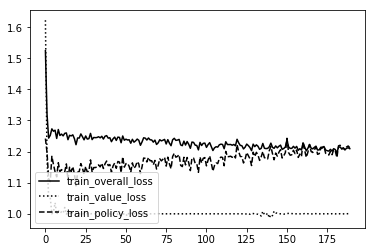




TOURNAMENT...
1 games_explored = 28235000
 o     
 O   o 
    Oo 
  *   *
     * 
       
       
-------
Turn Numbers: [3, 3]
Healths: [97, 97]
Possible Actions: [0, 1, 2, 3]
Current Turn: 0
Current Lengths: 3 3
--------------
games_explored = 28236000
       
O  Ooo 
o      
  *   *
     * 
       
       
-------
Turn Numbers: [4, 3]
Healths: [96, 97]
Possible Actions: [0, 1, 2, 3]
Current Turn: 1
Current Lengths: 3 3
--------------
games_explored = 28237000
  o    
  O    
       
  *   *
Oo   * 
       
       
-------
Turn Numbers: [7, 6]
Healths: [93, 94]
Possible Actions: [0, 1, 2, 3]
Current Turn: 1
Current Lengths: 3 3
--------------
games_explored = 28238000
       
o      
o      
O *   *
     * 
       
Oo     
-------
Turn Numbers: [9, 8]
Healths: [91, 92]
Possible Actions: [1, 2, 3]
Current Turn: 1
Current Lengths: 3 3
--------------
games_explored = 28239000
       
       
oo     
 O*   *
     * 
 O     
oo     
-------
Turn Numbers: [9, 9]
Healths: [91, 91]
Possibl

games_explored = 28274000
       
*   o  
    oo 
  * oo*
 *  Oo 
    Oo 
       
-------
Turn Numbers: [48, 47]
Healths: [98, 76]
Possible Actions: [0, 1, 2, 3]
Current Turn: 1
Current Lengths: 5 4
--------------
games_explored = 28275000
       
*      
   oo  
 Ooo o*
 *  oo 
    oO 
       
-------
Turn Numbers: [49, 49]
Healths: [97, 99]
Possible Actions: [0, 1, 2, 3]
Current Turn: 0
Current Lengths: 5 5
--------------
games_explored = 28276000
       
*      
       
 O*o  *
 oooo  
    o* 
   oO  
-------
Turn Numbers: [51, 51]
Healths: [95, 99]
Possible Actions: [0, 1, 2]
Current Turn: 0
Current Lengths: 5 5
--------------
games_explored = 28277000
       
*      
    *  
  *o  *
 * oo  
  Ooo  
    ooO
-------
Turn Numbers: [51, 50]
Healths: [95, 73]
Possible Actions: [0, 1, 2, 3]
Current Turn: 1
Current Lengths: 5 4
--------------
games_explored = 28278000
       
*      
       
  *   O
oO    o
 oo   o
  * ooo
-------
Turn Numbers: [54, 54]
Healths: [100, 98]
Possible Action

games_explored = 28313000
       
    o  
O   o  
o * O *
  *  * 
       
       
-------
Turn Numbers: [5, 4]
Healths: [95, 96]
Possible Actions: [0, 1, 2, 3]
Current Turn: 1
Current Lengths: 3 3
--------------
games_explored = 28314000
       
Ooo    
       
oOo   *
  *  * 
       
       
-------
Turn Numbers: [7, 6]
Healths: [99, 94]
Possible Actions: [1, 2, 3]
Current Turn: 1
Current Lengths: 4 3
--------------
games_explored = 28315000
       
Ooo    
       
oo*   *
 oO  * 
       
       
-------
Turn Numbers: [7, 6]
Healths: [100, 94]
Possible Actions: [1, 2, 3]
Current Turn: 1
Current Lengths: 4 3
--------------
games_explored = 28316000
oo     
O      
       
  *   *
oo*  * 
O      
       
-------
Turn Numbers: [8, 8]
Healths: [92, 92]
Possible Actions: [1, 2, 3]
Current Turn: 0
Current Lengths: 3 3
--------------
games_explored = 28317000
 O     
oo     
       
  *   *
  *  * 
o      
*O     
-------
Turn Numbers: [10, 10]
Healths: [90, 90]
Possible Actions: [0, 1, 2]
C

games_explored = 28352000
  *    
 oO   *
 o   * 
  *   *
 ooo * 
  Oo   
       
-------
Turn Numbers: [10, 10]
Healths: [98, 90]
Possible Actions: [0, 1, 2, 3]
Current Turn: 0
Current Lengths: 5 3
--------------
games_explored = 28353000
  *  * 
      *
  Oo   
  *oOo*
   o * 
       
       
-------
Turn Numbers: [12, 11]
Healths: [96, 89]
Possible Actions: [0, 1, 2, 3]
Current Turn: 1
Current Lengths: 5 3
--------------
games_explored = 28354000
  *o   
   O  *
     o 
  *ooO*
     * 
   *   
       
-------
Turn Numbers: [13, 13]
Healths: [95, 87]
Possible Actions: [0, 1, 2, 3]
Current Turn: 0
Current Lengths: 5 3
--------------
games_explored = 28355000
  Ooo O
    o o
     oo
  * oo*
     * 
   *   
       
-------
Turn Numbers: [15, 15]
Healths: [99, 100]
Possible Actions: [0, 3]
Current Turn: 0
Current Lengths: 6 4
--------------
games_explored = 28356000
  oo   
 Oo   *
     oo
  *  oo
    Ooo
   *   
       
-------
Turn Numbers: [17, 17]
Healths: [99, 98]
Possible Actions: 

games_explored = 28391000
oo     
oo*    
 o  *  
Oo    *
o  *   
oo *   
oO     
-------
Turn Numbers: [38, 38]
Healths: [88, 93]
Possible Actions: [0, 1, 2]
Current Turn: 0
Current Lengths: 6 7
--------------
games_explored = 28392000
oo     
oOo    
 oo *  
      *
   *   
o  *   
ooooO  
-------
Turn Numbers: [39, 39]
Healths: [87, 99]
Possible Actions: [0, 1, 2]
Current Turn: 0
Current Lengths: 6 8
--------------
games_explored = 28393000
o      
ooOo   
 oo *  
      *
Oo *   
 oo*  *
 oo    
-------
Turn Numbers: [41, 40]
Healths: [85, 98]
Possible Actions: [0, 1, 2, 3]
Current Turn: 1
Current Lengths: 6 8
--------------
games_explored = 28394000
o      
ooooo  
 ooOo  
      *
   *   
ooo*   
Oo     
-------
Turn Numbers: [43, 42]
Healths: [83, 100]
Possible Actions: [0, 1, 2, 3]
Current Turn: 1
Current Lengths: 6 10
--------------
games_explored = 28395000
       
  oooo 
 o* *oO
oO    *
o  *   
ooo*   
       
-------
Turn Numbers: [43, 43]
Healths: [83, 95]
Possible Actions:

games_explored = 28430000
  * ooo
    o o
  Ooo*o
  oOo  
       
    *  
  *    
-------
Turn Numbers: [23, 23]
Healths: [99, 77]
Possible Actions: [0, 1, 2, 3]
Current Turn: 0
Current Lengths: 11 3
--------------
games_explored = 28431000
  * ooo
    o  
 o oo* 
 o o*  
 Ooo   
  o *  
  O    
-------
Turn Numbers: [25, 24]
Healths: [100, 76]
Possible Actions: [0, 1, 2, 3]
Current Turn: 1
Current Lengths: 11 3
--------------
games_explored = 28432000
  * o  
    o  
   oo* 
 o o*  
OooO   
  oo*  
  *    
-------
Turn Numbers: [26, 25]
Healths: [95, 75]
Possible Actions: [1, 2, 3]
Current Turn: 1
Current Lengths: 10 3
--------------
games_explored = 28433000
  *    
    o  
   oo* 
Oo o*  
  ooo  
  ooO  
  *    
-------
Turn Numbers: [28, 28]
Healths: [98, 72]
Possible Actions: [0, 1, 2, 3]
Current Turn: 0
Current Lengths: 11 3
--------------
games_explored = 28434000
  *    
       
   oo* 
 Ooo*  
  oo o 
  oooO 
  *    
-------
Turn Numbers: [29, 29]
Healths: [97, 71]
Possible Ac

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [9]:
lg.logger_main.info('=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*')
lg.logger_main.info('=*=*=*=*=*=.      NEW LOG      =*=*=*=*=*')
lg.logger_main.info('=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*')

LAYERS = 6
env = Game()

# If loading an existing neural network, copy the config file to root
if initialise.INITIAL_RUN_NUMBER != None:
    copyfile(run_archive_folder + env.name + '/run' + str(initialise.INITIAL_RUN_NUMBER).zfill(4) + '/config.py', './config.py')

import config

######## LOAD MEMORIES IF NECESSARY ########

if initialise.INITIAL_MEMORY_VERSION == None:
    memory = Memory(config.MEMORY_SIZE)
else:
    print('LOADING MEMORY VERSION ' + str(initialise.INITIAL_MEMORY_VERSION) + '...')
    memory = pickle.load( open( run_archive_folder + env.name + '/run' + str(initialise.INITIAL_RUN_NUMBER).zfill(4) + "/memory/memory" + str(initialise.INITIAL_MEMORY_VERSION).zfill(4) + ".p",   "rb" ) )

######## LOAD MODEL IF NECESSARY ########

# create an untrained neural network objects from the config file
current_NN = Residual_CNN(config.REG_CONST, config.LEARNING_RATE, (LAYERS,) + env.grid_shape,   env.action_size, config.HIDDEN_CNN_LAYERS)
best_NN = Residual_CNN(config.REG_CONST, config.LEARNING_RATE, (LAYERS,) +  env.grid_shape,   env.action_size, config.HIDDEN_CNN_LAYERS)

#If loading an existing neural netwrok, set the weights from that model
if initialise.INITIAL_MODEL_VERSION != None:
    best_player_version  = initialise.INITIAL_MODEL_VERSION
    print('LOADING MODEL VERSION ' + str(initialise.INITIAL_MODEL_VERSION) + '...')
    m_tmp = best_NN.read(env.name, initialise.INITIAL_RUN_NUMBER, best_player_version)
    current_NN.model.set_weights(m_tmp.get_weights())
    best_NN.model.set_weights(m_tmp.get_weights())
#otherwise just ensure the weights on the two players are the same
else:
    best_player_version = 0
    best_NN.model.set_weights(current_NN.model.get_weights())

#copy the config file to the run folder
copyfile('./config.py', run_folder + 'config.py')
plot_model(current_NN.model, to_file=run_folder + 'models/model.png', show_shapes = True)

print('\n')

######## CREATE THE PLAYERS ########

current_player = Agent('current_player', env.state_size, env.action_size, config.MCTS_SIMS, config.CPUCT, current_NN)
best_player = Agent('best_player', env.state_size, env.action_size, config.MCTS_SIMS, config.CPUCT, best_NN)
#user_player = User('player1', env.state_size, env.action_size)
iteration = 0

while 1:

    iteration += 1
    reload(lg)
    reload(config)
    
    print('ITERATION NUMBER ' + str(iteration))
    
    lg.logger_main.info('BEST PLAYER VERSION: %d', best_player_version)
    print('BEST PLAYER VERSION ' + str(best_player_version))

    ######## SELF PLAY ########
    print('SELF PLAYING ' + str(config.EPISODES) + ' EPISODES...')
    _, memory, _, _ = playMatches(best_player, best_player, config.EPISODES, lg.logger_main, turns_until_tau0 = config.TURNS_UNTIL_TAU0, memory = memory)
    print('\n')
    
    memory.clear_stmemory()
    
    if len(memory.ltmemory) >= config.MEMORY_SIZE:

        ######## RETRAINING ########
        print('RETRAINING...')
        current_player.replay(memory.ltmemory)
        print('')

        if iteration % 5 == 0:
            pickle.dump( memory, open( run_folder + "memory/memory" + str(iteration).zfill(4) + ".p", "wb" ) )

        lg.logger_memory.info('====================')
        lg.logger_memory.info('NEW MEMORIES')
        lg.logger_memory.info('====================')
        
        memory_samp = random.sample(memory.ltmemory, min(1000, len(memory.ltmemory)))
        
        for s in memory_samp:
            current_value, current_probs, _ = current_player.get_preds(s['state'])
            best_value, best_probs, _ = best_player.get_preds(s['state'])

            lg.logger_memory.info('MCTS VALUE FOR %s: %f', s['playerTurn'], s['value'])
            lg.logger_memory.info('CUR PRED VALUE FOR %s: %f', s['playerTurn'], current_value)
            lg.logger_memory.info('BES PRED VALUE FOR %s: %f', s['playerTurn'], best_value)
            lg.logger_memory.info('THE MCTS ACTION VALUES: %s', ['%.2f' % elem for elem in s['AV']]  )
            lg.logger_memory.info('CUR PRED ACTION VALUES: %s', ['%.2f' % elem for elem in  current_probs])
            lg.logger_memory.info('BES PRED ACTION VALUES: %s', ['%.2f' % elem for elem in  best_probs])
            lg.logger_memory.info('ID: %s', s['state'].id)
            lg.logger_memory.info('INPUT TO MODEL: %s', current_player.model.convertToModelInput(s['state']))

            s['state'].render(lg.logger_memory)
            
        ######## TOURNAMENT ########
        print('TOURNAMENT...')
        scores, _, points, sp_scores = playMatches(best_player, current_player, config.EVAL_EPISODES, lg.logger_tourney, turns_until_tau0 = 0, memory = None)
        print('\nSCORES')
        print(scores)
        print('\nSTARTING PLAYER / NON-STARTING PLAYER SCORES')
        print(sp_scores)
        #print(points)

        print('\n\n')

        if scores['current_player'] > scores['best_player'] * config.SCORING_THRESHOLD:
            best_player_version = best_player_version + 1
            best_NN.model.set_weights(current_NN.model.get_weights())
            best_NN.write(env.name, best_player_version)

    else:
        print('MEMORY SIZE: ' + str(len(memory.ltmemory)))

## The following panels are not involved in the learning process

### Play matches between versions (use -1 for human player)

In [ ]:
from game import Game
from funcs import playMatchesBetweenVersions
import loggers as lg

env = Game()
playMatchesBetweenVersions(env, 1, 6, -1, 10, lg.logger_tourney, 0)

### Pass a particular game state through the neural network (setup below for Connect4)

In [8]:
gs = GameState(np.array([
    0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,
    0,0,0,0,0,0,0
]), 1)

preds = current_player.get_preds(gs)

print(preds)

ValueError: cannot reshape array of size 84 into shape (2,5,5)

### See the layers of the current neural network

In [7]:
current_player.model.viewLayers()

LAYER 0


<Figure size 216x0 with 0 Axes>

LAYER 1


KeyboardInterrupt: 

### Output a diagram of the neural network architecture

In [6]:
from keras.utils import plot_model
plot_model(current_NN.model, to_file=run_folder + 'models/model.png', show_shapes = True)